# Prosper Loan Data Analysis
## by Rofhiwa Kgomo

## Introduction
> **Prosper Loan Data Analysis DataSet**

>The Prosper loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status and borrower income.
 

## Preliminary Wrangling
> I will conduct an exploratory data analysis on a dataset of prosper loans. I will be using Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

> I will also take the main findings from the exploration and convey them to others through an explanatory analysis. To the end, I will create a slide deck that leverages polished, explanatory visualizations to communicate the results.


## Data Gathering

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

import seaborn as sb

%matplotlib inline

In [2]:
# loading dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Data Assessing, checking data types
df_loan.shape

(113937, 81)

### Checking out for duplicates

> There seems to be  multiple loan identifiers, which I will be checking out below

In [4]:
# Check for missing values
df_loan.isna().any()

ListingKey                             False
ListingNumber                          False
ListingCreationDate                    False
CreditGrade                             True
Term                                   False
LoanStatus                             False
ClosedDate                              True
BorrowerAPR                             True
BorrowerRate                           False
LenderYield                            False
EstimatedEffectiveYield                 True
EstimatedLoss                           True
EstimatedReturn                         True
ProsperRating (numeric)                 True
ProsperRating (Alpha)                   True
ProsperScore                            True
ListingCategory (numeric)              False
BorrowerState                           True
Occupation                              True
EmploymentStatus                        True
EmploymentStatusDuration                True
IsBorrowerHomeowner                    False
CurrentlyI

In [5]:
# there are multiple loan identifiers
df_loan.ListingKey.nunique()

113066

In [6]:
df_loan.ListingNumber.nunique()

113066

In [7]:
df_loan.LoanKey.nunique()

113066

> The above identifiers shows there are some duplicates in the given data. Which I will be cleanining up now.


#### Cleaning Duplicates

In [8]:
df_loan[df_loan.LoanKey.duplicated() == True].count()['LoanKey']

871

In [9]:
df_loan[df_loan.LoanKey.duplicated() == True]['LoanKey'].head()

9       02163700809231365A56A1C
999     CB643706582969191E8C26B
2539    DC303708663304668E74587
4942    8D84369399064302947D8B5
5812    129C369881799628360C904
Name: LoanKey, dtype: object

In [10]:
# different in ProsperScore, where the value also should not be > 10
# according to the dictionary and here we have 11
df_loan[df_loan.LoanKey == '02163700809231365A56A1C']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.0762,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [11]:
# the same issue as above
df_loan[df_loan.LoanKey == 'CB643706582969191E8C26B']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57494,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [12]:
df_loan.duplicated().sum()

0

In [13]:
df_loan.shape

(113937, 81)

#### Convert 'ListingCreationDate' to DateTime and extract only loans originated after 2009

In [14]:
#Extract only date
df_loan['ListingCreationDate']=pd.to_datetime(df_loan['ListingCreationDate'])
#Check results
df_loan['ListingCreationDate'].head()

0   2007-08-26 19:09:29.263
1   2014-02-27 08:28:07.900
2   2007-01-05 15:00:47.090
3   2012-10-22 11:02:35.010
4   2013-09-14 18:38:39.097
Name: ListingCreationDate, dtype: datetime64[ns]

>- Many variables, such as Prosper Score, are not available for loans originated before 2009. So only loans originated after 2009 are going to be selected.

In [15]:
#Extract loans
df_loan=df_loan[df_loan['ListingCreationDate'].dt.date> datetime.date(2009,8,1)]
#Check results 
(2006,2007,2008,2009) in df_loan['ListingCreationDate'].dt.year

False

>Having dropped the loans created after 2009, the amount of missing data is reduced, but there are still missing values in:

>- 'TotalProsperLoans'
>- 'ProsperPrincipalBorrowed'
>- 'DebtToIncomeRatio'

>All of the above columns contain numeric values. The missing values are stored as NaN (Not a Number).

>For the columns 'TotalProsperLoans' and 'ProsperPrincipalBorrowed' the values are missing only if the borrower does not have any previous loan with Prosper. Pandas does not take into account NaN to perform calculations and will use those numbers only for loans in which the borrower already have a loan with Prosper, the missing values are kept as NaN.

>Regarding 'DebtToIncomeRatio', it will be dropped as it will lead to a not accurate analysis.

### Handling duplicated observation

In [16]:
# drop duplicate rows
df_loan.drop_duplicates(inplace=True)
df_loan[df_loan.LoanKey.duplicated() == True].count()['LoanKey']

871

In [17]:
# all loans are now included only once
df_loan.shape

(84669, 81)

In [18]:
#Assessing further assessment
df_loan.duplicated().any()

False

### Variables selection and basic data cleaning

> The main loan and borrower indicators are selected for further       analysis based on the data dictionary.

> After dropping loans originated before 2009 there are no duplicated observations.

>In order for me to carry out the analysis, additional variables have to be created:

>- OriginationRate = BorrowerAPR - BorrowerRate. This is the rate applied to the loan amount to compute the Origination Fee.
>- OriginationFee = (BorrowerAPR - BorrowerRate) * LoanOriginalAmount. The Origination Fee paid by the borrower before receiving the loan.
>- Create ListingCategory column with alphanumeric values instead of numeric.
>- AlreadyProsperBorrower = indicates if borrower already had a loan with Prosper or not.

### Create OriginationRate

In [19]:
#Create OriginationRate
df_loan['OriginationRate'] = df_loan['BorrowerAPR'] - df_loan['BorrowerRate']
#Check results
df_loan['OriginationRate'].head()

1    0.02816
3    0.02788
4    0.03764
5    0.02285
6    0.03912
Name: OriginationRate, dtype: float64

### Create OriginationFee

In [20]:
#Create OriginationFee
df_loan['OriginationFee'] = df_loan['LoanOriginalAmount']*df_loan['OriginationRate']
#Check results
df_loan['OriginationFee'].head()

1    281.60
3    278.80
4    564.60
5    342.75
6    117.36
Name: OriginationFee, dtype: float64

### Creating A ListingCategory

In [21]:
def listing_category_alpha(ListingCategoryNumeric):
    if ListingCategoryNumeric==0:
        category = 'Not Available'
    if ListingCategoryNumeric==1:
        category = 'Debt Consolidation'
    if ListingCategoryNumeric==2:
        category = 'Home Improvement'
    if ListingCategoryNumeric==3:
        category = 'Business'
    if ListingCategoryNumeric==4:
        category = 'Personal Loan'
    if ListingCategoryNumeric==5:
        category = 'Student Use'
    if ListingCategoryNumeric==6:
        category = 'Auto'
    if ListingCategoryNumeric==7:
        category = 'Other'
    if ListingCategoryNumeric==8:
        category = 'Baby&Adoption'
    if ListingCategoryNumeric==9:
        category = 'Boat'
    if ListingCategoryNumeric==10:
        category = 'Cosmetic Procedure'
    if ListingCategoryNumeric==11:
        category = 'Engagement Ring'
    if ListingCategoryNumeric==12:
        category = 'Green Loans'
    if ListingCategoryNumeric==13:
        category = 'Household Expanses'
    if ListingCategoryNumeric==14:
        category = 'Large Purchases'
    if ListingCategoryNumeric==15:
        category = 'Medical/Dental'
    if ListingCategoryNumeric==16:
        category = 'Motorcycle'
    if ListingCategoryNumeric==17:
        category = 'RV'
    if ListingCategoryNumeric==18:
        category = 'Taxes'
    if ListingCategoryNumeric==19:
        category = 'Vacation'
    if ListingCategoryNumeric==20:
        category = 'Wedding Loans'
    return category

In [22]:
df_loan['ListingCategory']=df_loan['ListingCategory (numeric)'].apply(listing_category_alpha)
#Check results
df_loan['ListingCategory'].unique()


array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expanses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby&Adoption', 'Engagement Ring',
       'Large Purchases', 'Boat', 'RV', 'Cosmetic Procedure',
       'Not Available', 'Student Use', 'Green Loans'], dtype=object)

### Creating PastProsperBorrower

In [23]:
df_loan.loc[df_loan.TotalProsperLoans.isna(), 'PastProsperBorrower']= 'No'
df_loan['PastProsperBorrower'].fillna('Yes', inplace=True)
#Check results
df_loan['PastProsperBorrower'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84669 entries, 1 to 113936
Data columns (total 85 columns):
ListingKey                             84669 non-null object
ListingNumber                          84669 non-null int64
ListingCreationDate                    84669 non-null datetime64[ns]
CreditGrade                            0 non-null object
Term                                   84669 non-null int64
LoanStatus                             84669 non-null object
ClosedDate                             25821 non-null object
BorrowerAPR                            84669 non-null float64
BorrowerRate                           84669 non-null float64
LenderYield                            84669 non-null float64
EstimatedEffectiveYield                84669 non-null float64
EstimatedLoss                          84669 non-null float64
EstimatedReturn                        84669 non-null float64
ProsperRating (numeric)                84669 non-null float64
ProsperRating (Alpha)      

In [25]:
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,OriginationRate,OriginationFee
count,8.466900e+04,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,...,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000,84669.000000
mean,7.746492e+05,42.500230,0.226737,0.196087,0.186083,0.168844,0.080335,0.096093,4.071112,5.945104,...,376.239788,367.898145,7.639318,0.998094,0.017362,0.007878,4.266943,68.102033,0.030649,258.424653
std,2.360102e+05,11.649055,0.079887,0.074603,0.074603,0.068399,0.046718,0.030363,1.672714,2.375364,...,1721.684761,1701.170833,119.179819,0.020764,0.187118,0.108881,116.861356,95.056838,0.010369,176.989038
min,4.189980e+05,12.000000,0.049350,0.040000,0.030000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-94.200000,-504.410000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000,0.002150,3.350000
25%,5.590320e+05,36.000000,0.163610,0.135900,0.125900,0.116600,0.042400,0.074550,3.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.023970,133.560000
50%,7.402470e+05,36.000000,0.219450,0.187500,0.177500,0.161500,0.072400,0.092110,4.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,0.028380,211.970000
75%,9.800270e+05,60.000000,0.292540,0.257400,0.247400,0.224300,0.112000,0.116600,5.000000,8.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,97.000000,0.037310,359.700000
max,1.255725e+06,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.283700,7.000000,11.000000,...,25000.000000,25000.000000,7780.030000,1.012500,19.000000,9.000000,11000.000000,1189.000000,0.100800,1943.000000


### Save clean DataFrame as 'loans_data'

In [26]:
df_loan.to_csv('loan_data')

### Exploratory Data Analysis

In [27]:
loan_data = pd.read_csv('loan_data')

In [28]:
#Set plotting style
plt.style.use('ggplot')

### What is the structure of your dataset?

> I am dealing with a loan database of over 113k loans with 81 variables. To be able to do a meaningful analysis, I had to select a subset of these variables. After thourough data cleaning, My data has 8 rows and 62 columns.

### What is/are the main feature(s) of interest in your dataset?

> The interest rate of the loan, its amount, and the credit rating of the borrower are the main features of interest.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The supporting features of interest are the loan characteristics on the one hand, such as the loan amount, the date when the loan was taken, the term of the loan, the status of the loan, and some borrower characteristics on the other hand, such as the income, the employment and housing situation and debt to income ration of the borrower.

## Univariate Exploration


## Numeric Variables


### Distribution of Origination Rates

(count    84669.000000
 mean         0.030649
 std          0.010369
 min          0.002150
 25%          0.023970
 50%          0.028380
 75%          0.037310
 max          0.100800
 Name: OriginationRate, dtype: float64,
 Text(0.5,1,'Distribution of Origination Rates'))

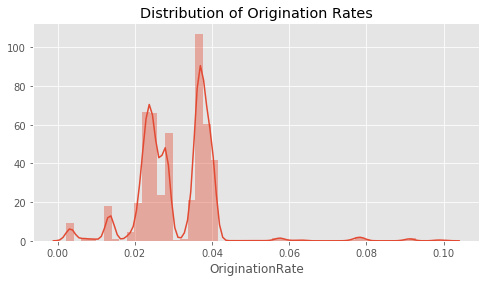

In [29]:
plt.figure(figsize=[8,4])
loan_data['OriginationRate'].describe(), sns.distplot(loan_data['OriginationRate']).set_title('Distribution of Origination Rates')

>The median origination rate is 2.8%. It is distributed in clusters as the rate is computed based on the risk profile. So each risk profile is associated with a origination rate.


### Distribution of Origination Fees

(count    84669.000000
 mean       258.424653
 std        176.989038
 min          3.350000
 25%        133.560000
 50%        211.970000
 75%        359.700000
 max       1943.000000
 Name: OriginationFee, dtype: float64,
 Text(0.5,1,'Distribution of Origination Fees ($)'))

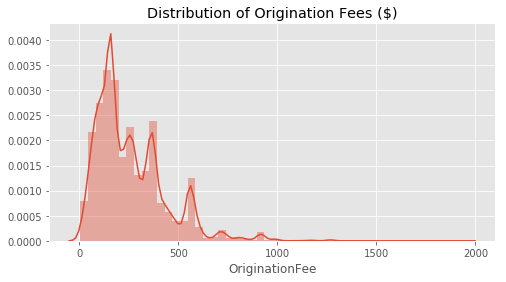

In [30]:
plt.figure(figsize=[8,4])
loan_data['OriginationFee'].describe(), sns.distplot(loan_data['OriginationFee']).set_title('Distribution of Origination Fees ($)')

>The median Origination Fee is 211.97 USD and the distribution is skewed to the left. It follows the distribution of the loans amounts as the Origination Fee is computed on the amount of the loan.


### Distribution of Estimated Returns

(count    84669.000000
 mean         0.096093
 std          0.030363
 min         -0.182700
 25%          0.074550
 50%          0.092110
 75%          0.116600
 max          0.283700
 Name: EstimatedReturn, dtype: float64,
 Text(0.5,1,'Distribution of Estimated Returns (% rate)'))

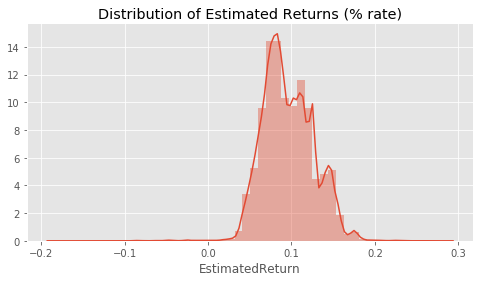

In [31]:
plt.figure(figsize=[8,4])
loan_data['EstimatedReturn'].describe(), sns.distplot(loan_data['EstimatedReturn']).set_title('Distribution of Estimated Returns (% rate)')

### Distribution of Loan Original Amounts

(count    84669.000000
 mean      9094.257981
 std       6288.595873
 min       1000.000000
 25%       4000.000000
 50%       7500.000000
 75%      13750.000000
 max      35000.000000
 Name: LoanOriginalAmount, dtype: float64,
 Text(0.5,1,'Distribution of Loan Original Amount'))

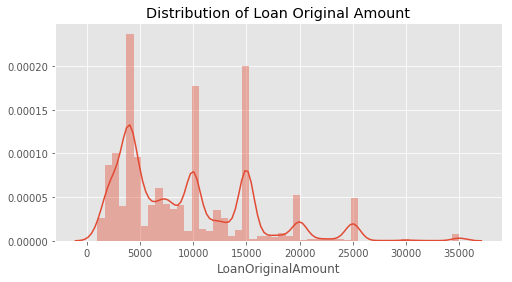

In [32]:
plt.figure(figsize=[8,4])
loan_data['LoanOriginalAmount'].describe(), sns.distplot(loan_data['LoanOriginalAmount']).set_title('Distribution of Loan Original Amount')

> The median loan amount is 7500 USD and the distribution is skewed to the left.

## Categorical Variables


> In this section the number of originations will be analysed across different dimensions.

### Originations by Loan Term

(36    69.105576
 60    28.989359
 12     1.905066
 Name: Term, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae48b230b8>)

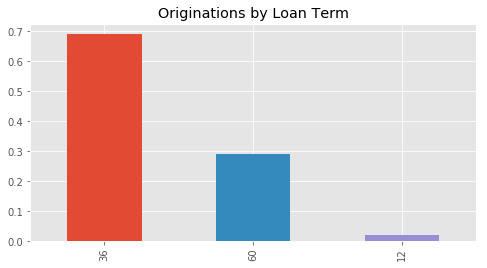

In [33]:
loan_data['Term'].value_counts(normalize=True)*100, loan_data['Term'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by Loan Term')

> The 69.1% of the loans has a 36 months term, which is by far the most frequent.


### Originations by Prosper Rating

(C     21.617121
 B     18.384533
 A     17.137323
 D     16.827883
 E     11.552044
 HR     8.176546
 AA     6.304551
 Name: ProsperRating (Alpha), dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae4895d0f0>)

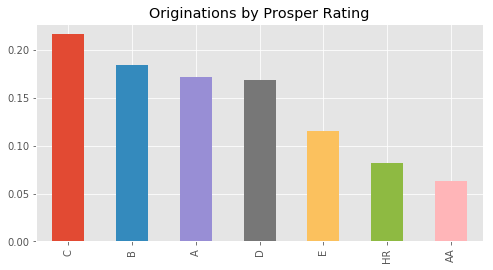

In [34]:
loan_data['ProsperRating (Alpha)'].value_counts(normalize=True)*100, loan_data['ProsperRating (Alpha)'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by Prosper Rating')

> The most frequent Rating is C (21.61%) followed by B (18.38%) and C (17.12%).


### Originations by IsBorrowerHomeowner

(True     52.84815
 False    47.15185
 Name: IsBorrowerHomeowner, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae48992b70>)

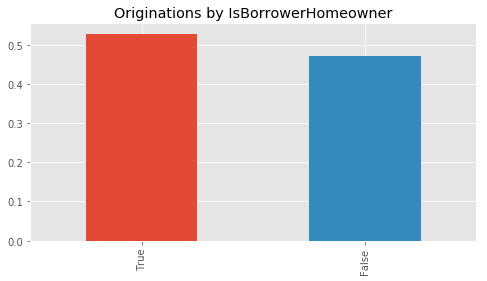

In [35]:
loan_data['IsBorrowerHomeowner'].value_counts(normalize=True)*100, loan_data['IsBorrowerHomeowner'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by IsBorrowerHomeowner')

> The 52.85% of Prosper borrowers own a home or have a related mortgage.


### Originations by Listing Category

(Debt Consolidation    62.697091
 Other                 10.839859
 Home Improvement       8.011197
 Business               6.241954
 Auto                   2.633786
 Household Expanses     2.357415
 Medical/Dental         1.797588
 Taxes                  1.045247
 Large Purchases        1.034617
 Wedding Loans          0.910605
 Vacation               0.907062
 Motorcycle             0.359045
 Student Use            0.310621
 Engagement Ring        0.256292
 Baby&Adoption          0.235033
 Cosmetic Procedure     0.107477
 Boat                   0.100391
 Green Loans            0.069683
 RV                     0.061416
 Not Available          0.023621
 Name: ListingCategory, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae48956630>)

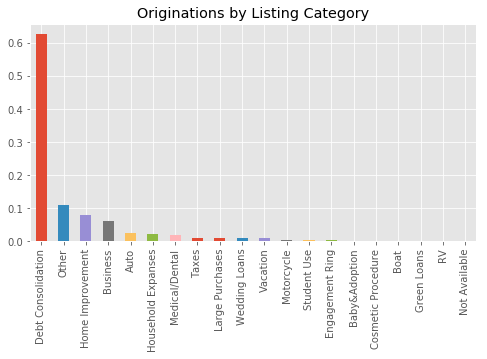

In [36]:
loan_data['ListingCategory'].value_counts(normalize=True)*100, loan_data['ListingCategory'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by Listing Category')

The most frequent reason of a loan is by far debt consolidation (62.70%).

### Originations by PastProsperBorrower

(No     76.757727
 Yes    23.242273
 Name: PastProsperBorrower, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae487f5b00>)

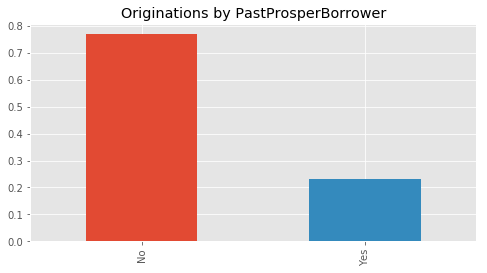

In [37]:
loan_data['PastProsperBorrower'].value_counts(normalize=True)*100, loan_data['PastProsperBorrower'].value_counts(normalize=True).plot(kind='bar', figsize=[8,4], title='Originations by PastProsperBorrower')

Only the 23.24% of borrowers have already had a loan with Prosper. And over 70% new borrowers

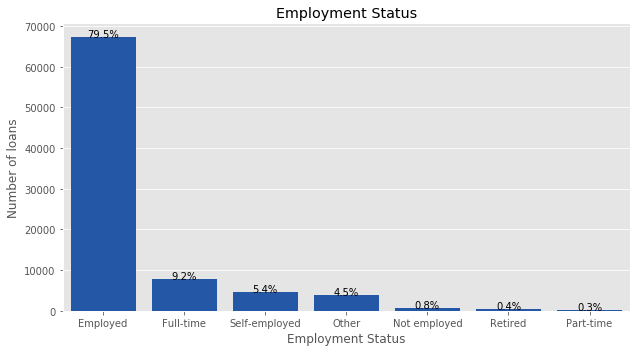

In [38]:
plt.figure(figsize=[9, 5])
status_counts = loan_data['EmploymentStatus'].value_counts()
status_order = status_counts.index
max_count = status_counts[0]
max_prop = max_count / loan_data.shape[0]
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

g = sb.countplot(data = loan_data, x = 'EmploymentStatus', color = "#0F52BA", order = status_order)
plt.xticks(rotation = 0)
plt.xlabel('Employment Status')
plt.ylabel('Number of loans')
plt.title('Employment Status')


# values must be ordered from the largest for this to work
for i in range(status_counts.shape[0]):
    count = status_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / loan_data.shape[0])
    plt.text(i, count+10, pct_string, ha = 'center')

plt.tight_layout();

The bar graph shows that most people who borrow loans are employed making up to 79.5%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- I looked at the distribution of Distribution of Origination Rates, Distribution of Origination Fees, Distribution of Estimated Returns and Originations by Prosper Rating just to name a few. I further explored the status of employment for Prosper loan borrowers.
>- The most frequent reason of a loan is by far for debt consolidation at 62.70%


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- I did my exploration on both numerical and categoral variables.
>- The unusual distribution is the median estimated return of 9.21%. The minimun is negative as for many loans has been estimated a loss.
>- Only the 23.24% of borrowers have already had a loan with Prosper. And over 70% new borrowers
>- The data shows that most people who borrow are employed making up to 79.5%.

## Bivariate Exploration

> In this section, I will be investigating relationships between pairs of variables in my
data. 

In [39]:
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower',
                'StatedMonthlyIncome', 'DebtToIncomeRatio', 'MonthsToClosed', 'Term']
bool_vars = ['LoanStatusActive', 'IncomeVerifiable', 'IsBorrowerHomeowner']
ordered_categoric_vars = ['IncomeRange', 'CreditRisk', 'CreditRating']

### Numeric variables

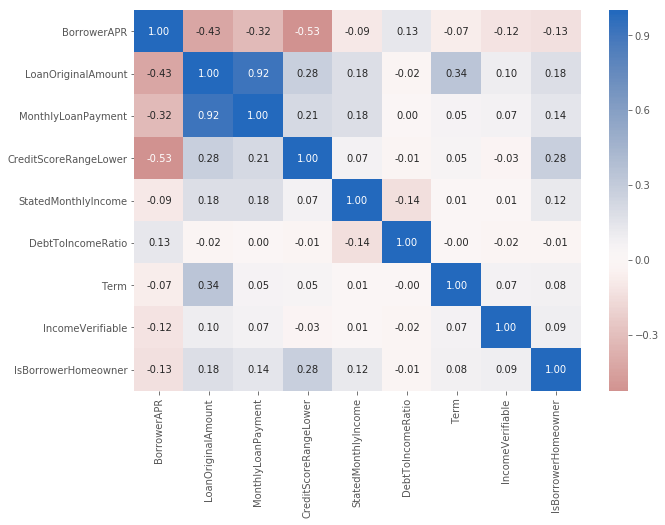

In [41]:
# correlations
plt.figure(figsize = [10, 7])
sb.heatmap(loan_data[['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower', 'StatedMonthlyIncome', \
              'DebtToIncomeRatio', 'Term', 'IncomeVerifiable', 'IsBorrowerHomeowner']]\
           .corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

>The dependent variables of the interest are BorrowerAPR, the borrower annual percentage rate, and LoanOriginalAmount such as the borrowed amount.
Based on the correlations, I looked into the following relationships of dependent variables:

>- BorrowerAPR - LoanOriginalAmount
>- BorrowerAPR - MonthlyLoanPayment
>- BorrowerAPR - CreditScoreRangeLower
>- LoanOriginalAmount - MonthlyLoanPayment
>- LoanOriginalAmount - CreditScoreRangeLower

>Furthermore, I see that borrowers with a verifiable income tend to have a lower debt to income ratio and that active loans are on average for a longer period, higher amounts and higher monthly payments than non-active loans.

#### Relationships of interest:

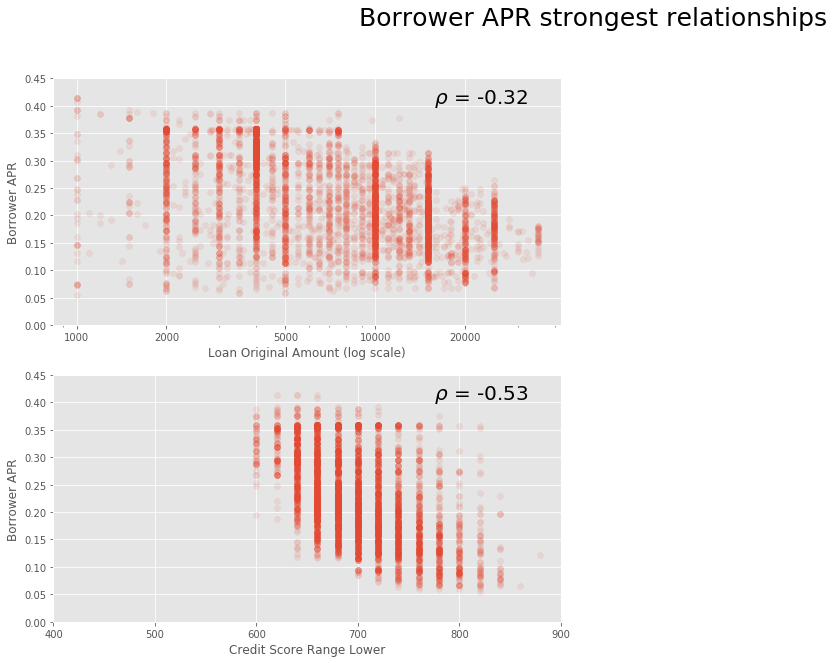

In [43]:
# a sample of 5000 from the data
sample = np.random.choice(loan_data.shape[0], 5000, replace = False)
df_samp = loan_data.iloc[sample,:]

plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
g = plt.scatter(data = df_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.xscale('log')
plt.xlabel('Loan Original Amount (log scale)')
plt.ylabel('Borrower APR')
plt.ylim((0,0.45))
plt.xticks([1000, 2000, 5000, 10000, 20000], [1000, 2000, 5000, 10000, 20000])

# display the correlation
ax = plt.gca()
coef = loan_data[['MonthlyLoanPayment', 'BorrowerAPR']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes)

plt.subplot(2,2,3)
plt.scatter(data = df_samp, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', alpha = 1/10)
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Borrower APR')
plt.xlim((400, 900))
plt.ylim((0,0.45))
# display the correlation
ax = plt.gca()
coef = loan_data[['CreditScoreRangeLower', 'BorrowerAPR']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes)

plt.suptitle('Borrower APR strongest relationships', size = 25);

>The negative correlations of BorrowerAPR and loan original amount, monthly loan payment and credit score range lower are somewhat visible from the scatter plots and they all make logical sense.

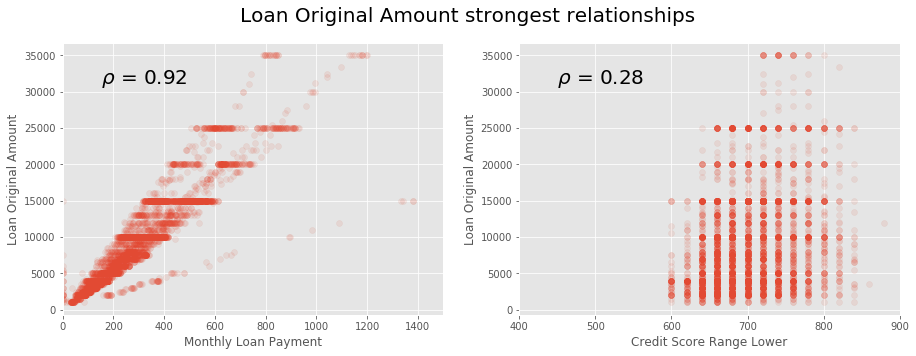

In [44]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(data = df_samp, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/10)
plt.ylabel('Loan Original Amount')
plt.xlabel('Monthly Loan Payment')
plt.xlim((0,1500))
# display the correlation
ax = plt.gca()
coef = loan_data[['MonthlyLoanPayment', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)

plt.subplot(1,2,2)
plt.scatter(data = df_samp, x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Loan Original Amount')
plt.xlim((400,900))
# display the correlation
ax = plt.gca()
coef = loan_data[['CreditScoreRangeLower', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)
plt.suptitle('Loan Original Amount strongest relationships', size = 20);

### Categorical variables



#### Origination Rate across Rating Categories

Text(0.5,1,'Origination Rate across Rating Categories')

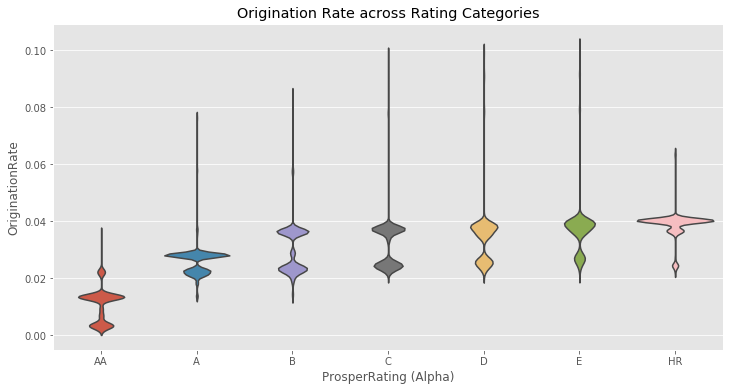

In [48]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loan_data, x='ProsperRating (Alpha)', y='OriginationRate', inner= None, order=['AA','A','B','C','D','E','HR']).set_title('Origination Rate across Rating Categories')

>As the Origination Rate is related to the risk profile of the borrower, it is possible to notice the it increases as the loans become riskier. Regarding the distribution, it become more spread out as the risk profile increases.



#### Origination Fees across Rating Categories

In [49]:
#% of origination fees by Rating
loan_data.groupby('ProsperRating (Alpha)')['OriginationFee'].sum()/loan_data['OriginationFee'].sum()*100

ProsperRating (Alpha)
A     19.541516
AA     3.312872
B     23.631980
C     26.564668
D     15.221770
E      7.512729
HR     4.214464
Name: OriginationFee, dtype: float64

Text(0,0.5,'OriginationFee')

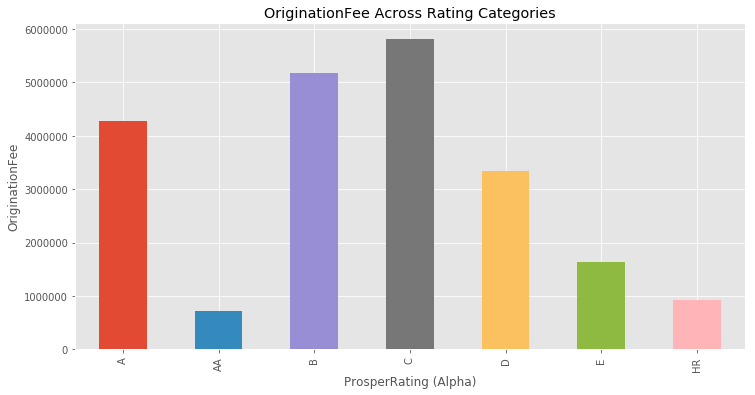

In [50]:
plt.figure(figsize=[12,6])
loan_data.groupby('ProsperRating (Alpha)')['OriginationFee'].sum().plot(kind='bar', title='OriginationFee Across Rating Categories').set_ylabel('OriginationFee')

>The Rating Category that generates most Origination Fees is C which also the most frequent. The distribution of Origination Fees across the Rating Categories follows the amount of loans originated by each category.



#### Origination Rate across Loan Term

Text(0.5,1,'Origination Rate across Loan Terms')

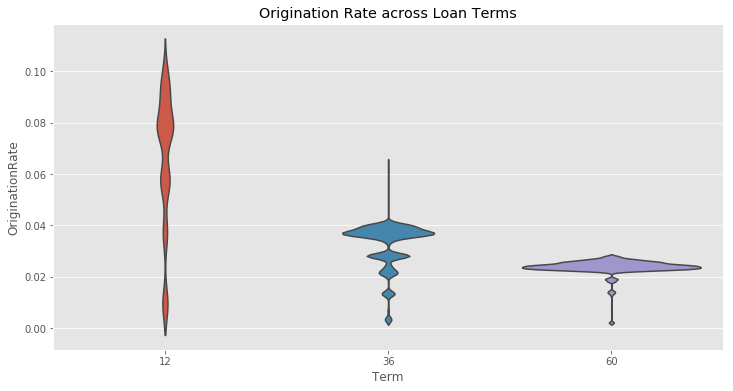

In [51]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loan_data, x='Term', y='OriginationRate', inner= None).set_title('Origination Rate across Loan Terms')

>The distribution of Origination Rate is more spread out for loans with a 12 months term and it decreases as the term increases.




#### Origination Fee across Loan Term

Text(0,0.5,'Origination Fee across Loan Term')

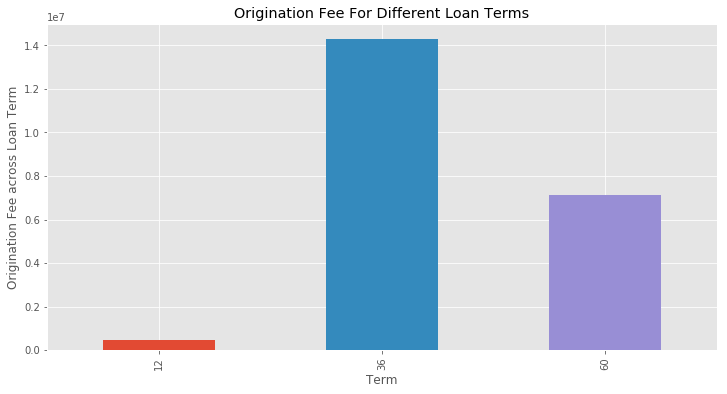

In [52]:
plt.figure(figsize=[12,6])
loan_data.groupby('Term')['OriginationFee'].sum().plot(kind='bar', title='Origination Fee For Different Loan Terms').set_ylabel('Origination Fee across Loan Term')

>Most of Origination Fees are generated by loans with a 36 months term, which are also the more frequent. The distribution of Origination Fees generated across different loan term follow the amount of loans originated for each category.



#### Origination Fees across Listing Categories

In [53]:
#% Origination fees by listing category
loan_data.groupby('ListingCategory')['OriginationFee'].sum()/loan_data['OriginationFee'].sum()*100

ListingCategory
Auto                   1.540786
Baby&Adoption          0.247794
Boat                   0.096102
Business               6.115706
Cosmetic Procedure     0.083671
Debt Consolidation    70.311530
Engagement Ring        0.227861
Green Loans            0.064166
Home Improvement       7.064253
Household Expanses     1.541565
Large Purchases        0.992663
Medical/Dental         1.367367
Motorcycle             0.237401
Not Available          0.016690
Other                  7.505475
RV                     0.054378
Student Use            0.078149
Taxes                  0.927503
Vacation               0.594693
Wedding Loans          0.932248
Name: OriginationFee, dtype: float64

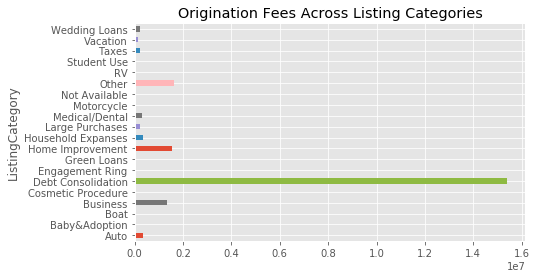

In [56]:
plt.figure(figsize=[12,6])
loan_data.groupby('ListingCategory')['OriginationFee'].sum().plot(kind='barh', title='Origination Fees Across Listing Categories', figsize=(7, 4))

#### Estimated Returns across Rating Categories

In [57]:
#Median of estimated return across Rating Categories
loan_data.groupby('ProsperRating (Alpha)')['EstimatedReturn'].median().sort_values(ascending=True)

ProsperRating (Alpha)
AA    0.05100
A     0.06663
B     0.08215
C     0.09220
D     0.11630
HR    0.12210
E     0.12370
Name: EstimatedReturn, dtype: float64

Text(0,0.5,'Distribution of Estimated Returns across Rating Categories')

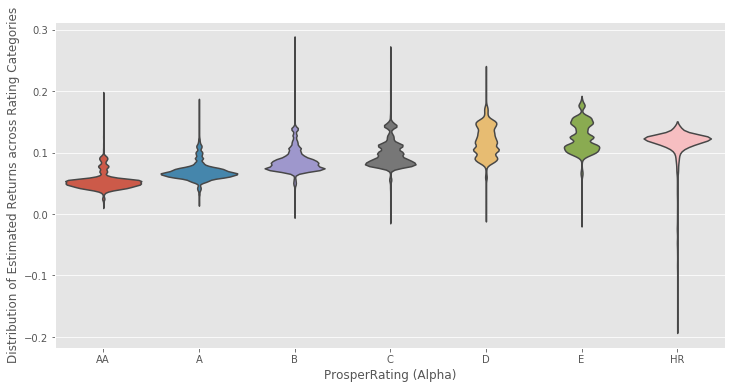

In [58]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loan_data, x='ProsperRating (Alpha)', y='EstimatedReturn',inner= None, order=['AA','A','B','C','D','E','HR']).set_ylabel('Distribution of Estimated Returns across Rating Categories')

>The median return increases as the risk profile increases, except for E which has a higher median return than HR. It may be due to the fact the HR loans have an higher estimated loss that affects the estimated returns.



#### Estimated Returns across Loan Term

Text(0.5,1,'Estimated Returns across Loan Term')

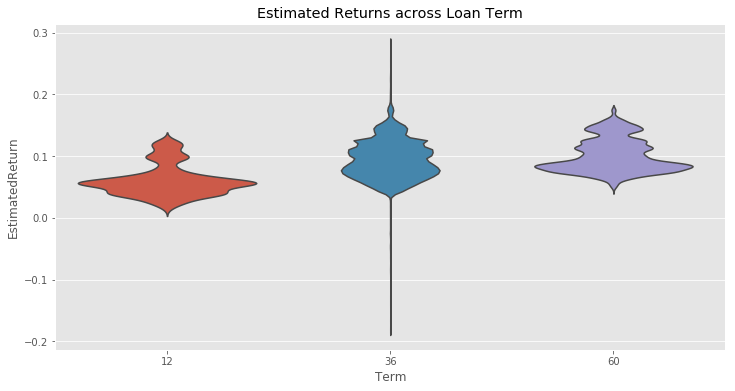

In [59]:
plt.figure(figsize=[12,6])
sns.violinplot(data=loan_data, x='Term', y='EstimatedReturn', inner= None).set_title('Estimated Returns across Loan Term')

>The median return increases along with the loan term. The distribution of the 36 months term loans is more spread out. It may be due to the fact that this is the most frequent loan term category and therefore it contains more outliers tha the others.



#### Loan Amounts across Loan Terms

In [60]:
#Median amounts across loan terms
loan_data.groupby('Term')['LoanOriginalAmount'].median().sort_values(ascending=True)

Term
12     3500
36     5500
60    11500
Name: LoanOriginalAmount, dtype: int64

Text(0.5,1,'Loan Amounts across Loan Terms')

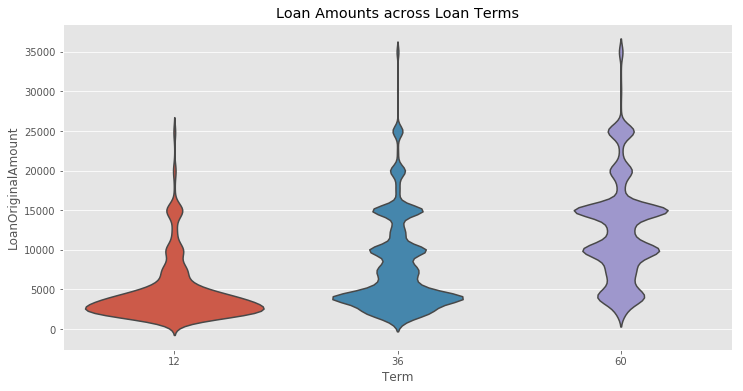

In [61]:
plt.figure(figsize=[12,6])
sns.violinplot(x='Term', y='LoanOriginalAmount', data=loan_data, inner=None).set_title('Loan Amounts across Loan Terms')

>The median amount increases as the loan term increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The dependent variables of the interest are BorrowerAPR, the borrower annual percentage rate, and LoanOriginalAmount such as the borrowed amount. Based on the correlations. Furthermore, I see that borrowers with a verifiable income tend to have a lower debt to income ratio and that active loans are on average for a longer period, higher amounts and higher monthly payments than non-active loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of Origination Fees are generated by loans with a 36 months term, which are also the more frequent. The distribution of Origination Fees generated across different loan term follow the amount of loans originated for each category. As the Origination Rate is related to the risk profile of the borrower, it is possible to notice the it increases as the loans become riskier. Regarding the distribution, it become more spread out as the risk profile increases.

## Multivariate Exploration



#### Top loan classes by Originations, Origination Fees and Loan Amounts

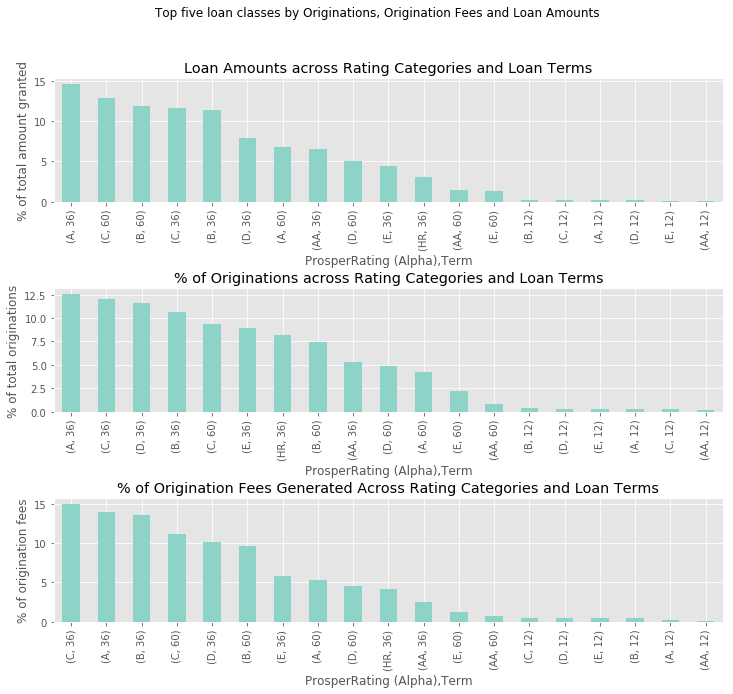

In [66]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['LoanOriginalAmount'].sum().sort_values(ascending=False)/loan_data['LoanOriginalAmount'].sum()*100).plot(kind='bar',title=('Loan Amounts across Rating Categories and Loan Terms'), ax=ax1, colormap='Set3').set_ylabel('% of total amount granted')
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count().sort_values(ascending=False)/loan_data.shape[0]*100).plot(kind='bar', title=('% of Originations across Rating Categories and Loan Terms'), ax=ax2, colormap='Set3').set_ylabel('% of total originations')
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loan_data['OriginationFee'].sum()*100).plot(kind='bar', title=('% of Origination Fees Generated Across Rating Categories and Loan Terms'), ax=ax3, colormap='Set3').set_ylabel('% of origination fees')
plt.suptitle('Top five loan classes by Originations, Origination Fees and Loan Amounts')
plt.subplots_adjust(wspace = 0.9, hspace = 0.7)

>Considering the percentage of origination fees, amount granted and amount of origination, the top positions are covered by the same classes of loans. For the purpose of the analysis the loans that are going to be picked as most profitable are those that generated the highest proportion of Origination Fees which is the main metric to ascertain whether a loan is profitable for Prosper or not.



#### Median number of Investors across Rating Categories and Loan Terms

Text(0,0.5,'Median number if investors')

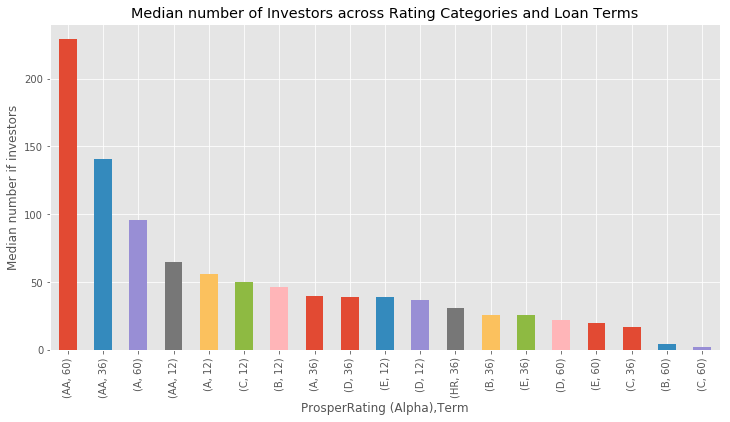

In [67]:
loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['Investors'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Median number of Investors across Rating Categories and Loan Terms').set_ylabel('Median number if investors')

>The loans classes that attracted the highest number of investors are those with a lower risk profile.



#### Loan Picking

The best loans are those that offer a good trade off between Origination Fees and Estimated Returns.

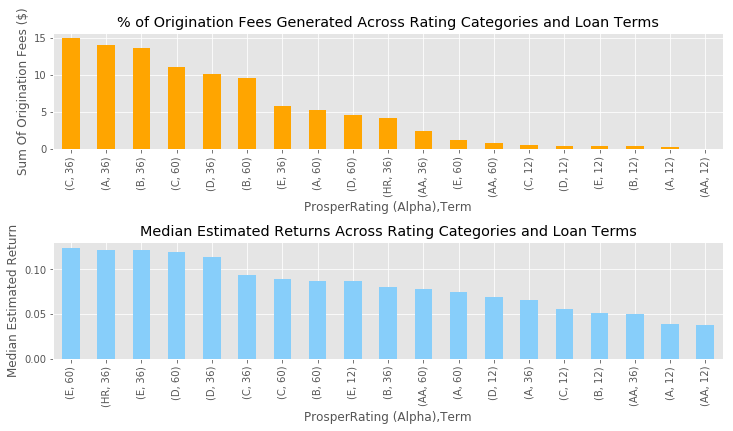

In [68]:
fig=plt.figure(figsize=[20,12])
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
(loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loan_data['OriginationFee'].sum()*100).plot(kind='bar', figsize=(12,6), ax=ax1, title='% of Origination Fees Generated Across Rating Categories and Loan Terms', color='orange').set_ylabel('Sum Of Origination Fees ($)')
loan_data.groupby(['ProsperRating (Alpha)', 'Term'])['EstimatedReturn'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ax=ax2, title='Median Estimated Returns Across Rating Categories and Loan Terms', color='lightskyblue').set_ylabel('Median Estimated Return')
plt.subplots_adjust(hspace=0.8)


>The most profitable loans are:

>- C36
>- A36
>- B36
>- C60
>- D36
>- B60

In [69]:
#Create dataframe with most profitable loans for further profiling of borrowers
C36 = loan_data[(loan_data['ProsperRating (Alpha)']=='C')&(loan_data['Term']==36)]
A36 = loan_data[(loan_data['ProsperRating (Alpha)']=='A')&(loan_data['Term']==36)]
B36 = loan_data[(loan_data['ProsperRating (Alpha)']=='B')&(loan_data['Term']==36)]
C60 = loan_data[(loan_data['ProsperRating (Alpha)']=='C')&(loan_data['Term']==60)]
D36 = loan_data[(loan_data['ProsperRating (Alpha)']=='D')&(loan_data['Term']==36)]
B60 = loan_data[(loan_data['ProsperRating (Alpha)']=='B')&(loan_data['Term']==60)]

In [70]:
#Create dataframe with most profitable loans for further profiling of borrowers
profitable_loans=pd.concat([C36,A36,B36,C60,D36,B60], ignore_index=True)
profitable_loans.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,OriginationRate,OriginationFee,ListingCategory,PastProsperBorrower
0,7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493,NaN,36,Current,NaN,0.23939,0.2019,...,0.0,1.0,0,0,0.0,1,0.03749,374.90,Home Improvement,No
1,24,101B3596709094692AC79C0,1046345,2013-12-03 11:34:46.127,NaN,36,Current,NaN,0.19859,0.1620,...,0.0,1.0,0,0,0.0,1,0.03659,146.36,Debt Consolidation,No
2,28,0F53359346357513247D86B,989519,2013-11-02 16:01:28.050,NaN,36,Current,NaN,0.20268,0.1660,...,0.0,1.0,0,0,0.0,1,0.03668,366.80,Home Improvement,No
3,34,0F6C3603015887476F3F015,1180690,2014-02-24 12:55:20.430,NaN,36,Current,NaN,0.22966,0.1920,...,0.0,1.0,0,0,0.0,1,0.03766,376.60,Debt Consolidation,No
4,43,10B93591610781064F9C46B,943697,2013-10-08 13:48:43.950,NaN,36,Current,NaN,0.21290,0.1760,...,0.0,1.0,0,0,0.0,5,0.03690,184.50,Debt Consolidation,No


In [71]:
#save dataframe
profitable_loans.to_csv('profitable_loans')

In [73]:
#% of origination fees generated by profitable loans
profitable_loans['OriginationFee'].sum()/loan_data['OriginationFee'].sum()*10

7.341599272238196

In [75]:
#% of profitable loans
profitable_loans.shape[0]/loan_data.shape[0]

0.6341400040156374

In [76]:
#% of low risk profitable loans A36
A36.shape[0]/loan_data.shape[0]*100

12.54650462388832

In [77]:
#% of origination fees generated by low risk profitable loans A36
A36['OriginationFee'].sum()/loan_data['OriginationFee'].sum()*100

13.986565254575684

>The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The low risk profitable loans (A36) are the 12.5% of the total loans and generate the 14% of Origination Fees.

In [78]:
#% of origination fees acroos profitable loans
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum()/loan_data['OriginationFee'].sum()*100

ProsperRating (Alpha)  Term
A                      36      13.986565
B                      36      13.591879
                       60       9.620646
C                      36      14.950560
                       60      11.106795
D                      36      10.159548
Name: OriginationFee, dtype: float64

In [79]:
#% of originations across profitable loans
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count()/loan_data.shape[0]*100

ProsperRating (Alpha)  Term
A                      36      12.546505
B                      36      10.617818
                       60       7.393497
C                      36      11.974867
                       60       9.330452
D                      36      11.550863
Name: OriginationFee, dtype: float64

>The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The most profitable class of loans is A36, which has the lowest risk profile and is the 12.5% of the total loans and generates the 14% of Origination Fees.



#### Origination Fees and total loan originations across profitable loans and rest of loans

Text(0.5,0.98,'Origination Fees and total loan originations across profitable loans and rest of loans')

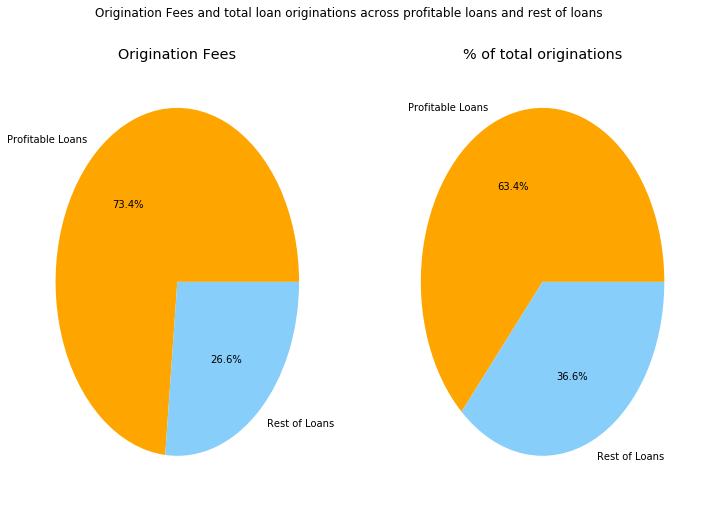

In [81]:
fig=plt.figure(figsize=[12,8])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.pie([profitable_loans['OriginationFee'].sum(),loan_data['OriginationFee'].sum()-profitable_loans['OriginationFee'].sum()],labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%', colors = ['orange', 'lightskyblue'])
ax1.set_title('Origination Fees')
ax2.pie([profitable_loans.shape[0],loan_data.shape[0]-profitable_loans.shape[0]], labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%',colors = ['orange', 'lightskyblue'])
ax2.set_title('% of total originations')
fig.suptitle('Origination Fees and total loan originations across profitable loans and rest of loans')

#### Employment Status across Rating Categories and Loan Terms

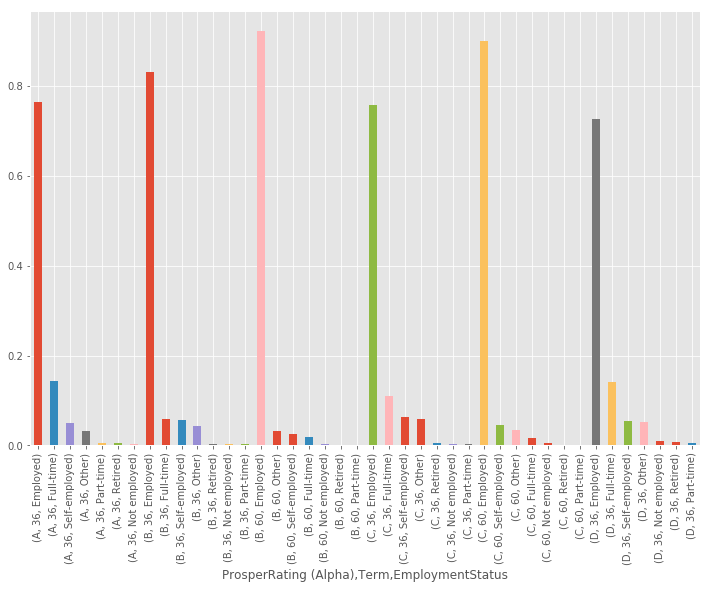

In [84]:
plt.figure(figsize=(12,8))
profitable_loans.groupby(['ProsperRating (Alpha)','Term'])['EmploymentStatus'].value_counts(normalize=True).plot(kind='bar')

> The rate of not employed borrowers slightly increases as the risk profile increases.



#### Stated Monthly Income across Rating Categories and Loan Terms

In [85]:
#Desciptive statistics for StatedMonthlyIncome across profitable loans
profitable_loans.groupby(['ProsperRating (Alpha)','Term'])['StatedMonthlyIncome'].describe()

count         mean          std  min  \
ProsperRating (Alpha) Term                                           
A                     36    10623.0  6685.947386  4563.130586  0.0   
B                     36     8990.0  6201.922228  4729.691429  0.0   
                      60     6260.0  6767.375799  4191.231684  0.0   
C                     36    10139.0  5718.118388  5940.499627  0.0   
                      60     7900.0  5967.962373  3932.877467  0.0   
D                     36     9780.0  5144.554124  3637.349564  0.0   

                                    25%          50%          75%  \
ProsperRating (Alpha) Term                                          
A                     36    4074.500000  5733.333333  8083.333333   
B                     36    3591.666667  5166.666667  7500.000000   
                      60    4184.770833  5833.333333  8333.333333   
C                     36    3333.333333  4750.000000  6750.000000   
                      60    3750.000000  5166.666667  7083.333333   
D                     36    3000.000000  4333.333333  6250.729167   

                                      max  
ProsperRating (Alpha) Term                 
A                     36     91666.666667  
B                     36     83333.333333  
                      60    108750.000000  
C                     36    394400.000000  
                      60     78364.416667  
D                     36     83333.333333

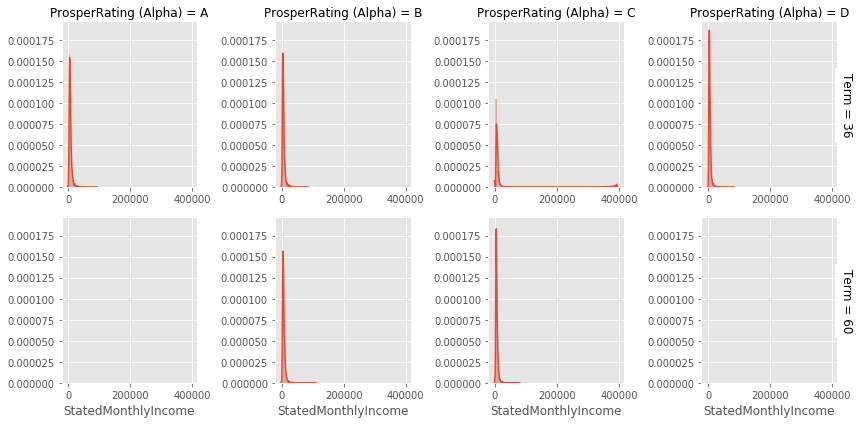

In [86]:
g=sns.FacetGrid(data=profitable_loans, row='Term', col='ProsperRating (Alpha)', col_order=['A','B','C','D'], margin_titles=True)
g=g.map(sns.distplot, 'StatedMonthlyIncome')

>There is no clear trend for these distributions.



#### Median Values of Credit History Variables Across Rating Categories and Loan Terms

In [87]:
#Table of credit history variables
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])[['CurrentCreditLines','OpenCreditLines','TotalInquiries','CurrentDelinquencies']].median()

CurrentCreditLines  OpenCreditLines  \
ProsperRating (Alpha) Term                                        
A                     36                  10.0              9.0   
B                     36                  10.0              9.0   
                      60                  11.0             10.0   
C                     36                  10.0              9.0   
                      60                  10.0              9.0   
D                     36                   9.0              8.0   

                            TotalInquiries  CurrentDelinquencies  
ProsperRating (Alpha) Term                                        
A                     36               3.0                   0.0  
B                     36               3.0                   0.0  
                      60               3.0                   0.0  
C                     36               3.0                   0.0  
                      60               3.0                   0.0  
D                     36               4.0                   0.0

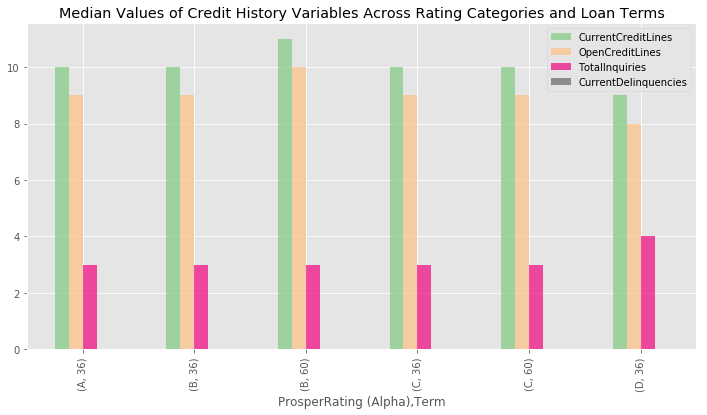

In [88]:
plt.figure(figsize=(12,6))
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])[['CurrentCreditLines','OpenCreditLines','TotalInquiries','CurrentDelinquencies']].median().plot(kind='bar',figsize=(12,6), title='Median Values of Credit History Variables Across Rating Categories and Loan Terms', colormap='Accent', alpha=0.7)

>There is no clear trend regarding the number of current credit lines and open credit lines. The number of inquires slightly increases in the most risky class D36.


#### Do Prosper past borrowers have lower Origination Fees?

Text(0.5,0.98,'Distribution of Origination Fees across past borrowers (orange) and new borrowers (green)')

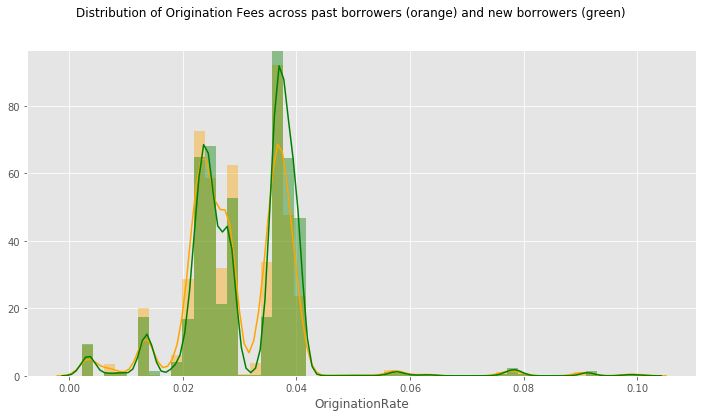

In [89]:
fig=plt.figure(figsize=(12,6))
sns.distplot(loan_data.query('PastProsperBorrower=="Yes"')['OriginationRate'], color='orange' )
sns.distplot(loan_data.query('PastProsperBorrower=="No"')['OriginationRate'], color='green')
fig.suptitle('Distribution of Origination Fees across past borrowers (orange) and new borrowers (green)')

>Past Prosper borrowers are able to obtain on average a slightly lower Origination rate than the new borrowers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Considering the percentage of origination fees, amount granted and amount of origination, the top positions are covered by the same classes of loans. For the purpose of the analysis the loans that are going to be picked as most profitable are those that generated the highest proportion of Origination Fees which is the main metric to ascertain whether a loan is profitable for Prosper or not.

### Were there any interesting or surprising interactions between features?

> The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The low risk profitable loans (A36) are the 12.5% of the total loans and generate the 14% of Origination Fees. The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The most profitable class of loans is A36, which has the lowest risk profile and is the 12.5% of the total loans and generates the 14% of Origination Fees. The rate of not employed borrowers slightly increases as the risk profile increases.

## Conclusions
>As a result of the exploratory data analysis it is possible to highlight the following points:
>- The 61.1% of the loans have a term of 36 months.

>- The majority of the loans (57.1%) have been generated with the following Ratings:
 >- C:21.6%
 >- B: 18.38 %
 >- A: 17.12%
 
>- The majority of Prosper borrowers stated to be employed or retired, only the 0.72% of the borrowers stated to not have an occupation.
>- The 62.7% of the loans have been originated for debt consolidation.
>- The distribution of the Origination Rate is more spread out as the default risk increases.
>- As the Origination Fees are calculated based on the loan amount, the distribution of the Origination Fees followd the distribution of the loan amounts.
>- The majority of the Origination Fees have by originated by 36 months term loans, which are also the most frequent term.
>- The 70.31% of Origination Fees have by generated for loans originated for debt consolidation.
>- The median estimeted return increases as the risk profile increses, except for class E and HR (which has a lower estimated return), due to the fact that HR loans have a higher estimated loss.

>- The Loan classes that have generate the most of Origination Fees are:
 >- C36: 14.95%
 >- A36: 13.99%
 >- B36: 13.59%
 
>- The loans with the highest median Origination Fee are:
 >- B60: 341.68 USD
 >- A60: 331.95 USD
 >- E12: 315.88 USD
 
>- The loans that, according to historical data, have generated the most of Origination Fees are: C36, A36, B36, C60, D36 and B60. The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The most profitable class of loans is A36, which has the lowest risk profile and is the 12.5% of the total loans and generates the 14% of Origination Fees.

>- The proportion of homeowners, as expected, decreases as the risk profile increses.
>- Regarding the credit history the most discriminating variable is the number of inquiries, which slightly increases as the profile risk increases.
>- The past Prosper borrowers are able to obtain a slightly lower Origination rate, which may be due to the fact tha Prosper has more data available on past borrowers and therefore the chance to perform a better profiling.

#### Insights:

##### Disclaimer: what is stated below has not been statistically proven and further variables should be analysed in order to privide a more comprehensive picture of Prosper borrowers.

>- The amount of Origination Fees strongly depends on number of originations and the amount granted across each rating category. The Rating Category plays a pivotal role in determining what Origination rate is going to be applied to the loans amount.

>- The classes A36, B36, B60, C36, C60 and D36 represent the most profitable classes in terms of Origination Fees. The aforementioned categories offer the best tradeoff between estimated returns and proportion of Origination Fees.

>- The abovementioned classes of loans attracted a high number of originations (63.4% of the total loans originated). There are no data available on the number of unique borrowers present on the platform, so it was not possible to provide a proportion of borrowers that applied for a loan in these classes. As the majority of originations come from A36, B36, B60, C36, C60 and D36 they are likely to be appealing for the future potential borrowers. Hence, a further analysis of the profile of these borrowers will help Prosper to better target them. Additional data as spending behaviour and socio-economical data are needed to be collected in order to carry out a focused marketing campaign.

>- The highest median Origination Fees have been observed in B60, A60 and E12. Although they have not generated the highest amount of Origination Fees they seem profitable. Hence, a further analysis of the profile of these borrowers will help Prosper to better target them. Additional data as spending behaviour and socio-economical data are needed to be collected in order to carry out a focused marketing campaign to attract applicants for these classes.




## Limitations
>- Any kind of hypothesis testing have not been performed, the basis of this analysis are historical data. Hence, any suggestion for future strategies should be based on a further analysis.

>- Unfortunately, a profile of borrowers was not possible as the findings, according to the current data, does not show any isnightful trend about Porsper borrowers.

>- Many variables present in the original dataset have not been analysed, therefore a more comprehensive analysis should be performed to fill the gaps not covered by the current one.

>- This analysis does not consider socio-economical variables regarding loan applicants that may play a pivotal role in understanding their behaviour. A suggestion for further analysis is to consider more socio-economical and spending behaviour data about borrowers to better profile the most profitable borrowers and target them in marketing campaigns.
